# UpGrad: Lending Club Case Study

##### The Problem:
> A consumer finance company is facing financial losses due to loan defaults. They want to identify factors that predict whether a loan applicant is likely to default. This will help them reduce financial losses by making informed decisions about loan approvals.

##### The Data:
> The company has data on past loan applicants, including their profiles and loan information. This data includes whether the applicant defaulted or not and if the loan status is ongoing.

##### The Goal:
> Using various EDA processes to understand how customer attributes and loan attributes influence the likelihood of default. This knowledge can be used to improve loan decision-making and reduce financial losses for the company.

In [4]:
# Necessary imports
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [5]:
# Loading the data set and displaying a subset of rows in a transposed manner to get a view of all the columns.  
df = pd.read_csv("loan.csv", low_memory=False)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [6]:
# Shape of the data frame before processing.
df_shape = df.shape
print("Columns in the dataframe:", df_shape[1])
print("Rows in the dataframe:", df_shape[0])

Columns in the dataframe: 111
Rows in the dataframe: 39717


In [7]:
# Overall statistical brief of the data frame before processing.
overall_stats = df.describe()
overall_stats

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
# Check for total percentage of null values in each column 
percent_null = 100*(df.isnull().sum()/df_shape[0])
percent_null

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [9]:
# Removing columns having 70% and more null values.
missing_threshold = 0.7*len(df)
df_cleaned = df.dropna(thresh=missing_threshold, axis=1)

# Removing columns that are not required for this analysis.
not_reqd = ["member_id","policy_code","url","zip_code","emp_title","title","last_pymnt_d",
            "out_prncp","out_prncp_inv","revol_bal","pymnt_plan","issue_d","initial_list_status","application_type",
            "acc_now_delinq", "delinq_amnt"]
df_cleaned = df_cleaned.drop(not_reqd,axis=1)

In [10]:
# The applicants with loan_status = current indicate already approved applications. 
# So, can be ignored for the current analysis. Dropping all the records with loan_status = current
df_cleaned = df_cleaned[df_cleaned['loan_status'] != 'Current']

In [11]:
# Check for the total percentage of null values in each column after cleaning data.
clean_percent_null = 100*(df_cleaned.isnull().sum()/df_cleaned.shape[0])
clean_percent_null

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_util                    0.129611
total_acc                     0.000000
total_pymnt                   0.000000
total_pymnt_inv          

In [12]:
# Filling the null values for emp_length column with 0 assuming that the borrower hasn't worked many years for his data 
# to be recorded. Also, using regex to extract the number of years from all of the data.
df_cleaned['emp_length'].fillna(value=0,inplace=True)
df_cleaned['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'], errors='coerce')

In [13]:
# Replacing percentage sign in revol_util column and converting the column to a float point data type.
df_cleaned["revol_util"].replace(r'%', '', regex=True, inplace=True)
df_cleaned['revol_util'] = pd.to_numeric(df_cleaned['revol_util'], errors='coerce')

In [14]:
# Replacing percentage sign in int_rate column and converting the column to a float point data type.
df_cleaned["int_rate"].replace(r'%', '', regex=True, inplace= True)
df_cleaned['int_rate'] = df_cleaned['int_rate'].replace('N/A', pd.NA)
df_cleaned['int_rate'] = df_cleaned['int_rate'].astype(float)

In [15]:
# Overall info of the data frame after cleaning.
cleaned_gen_info = df_cleaned.info()
cleaned_gen_info

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 38577 no

In [16]:
# Overall statistical brief of the data frame after cleaning.
cleaned_stats = df_cleaned.describe()
cleaned_stats

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38521.0,37880.000000,38538.0
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,4.925526,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,48.702777,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,0.0,0.043479,0.0
std,2.092639e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.453921,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,28.364741,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.204583,0.0
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,25.200000,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,0.0,0.000000,0.0
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,49.100000,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,0.0,0.000000,0.0
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,72.300000,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,0.0,0.000000,0.0
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


In [17]:
# Shape of the data frame after cleaning.
df_cleaned_shape = df_cleaned.shape
print("Columns in the dataframe after cleaning:", df_cleaned_shape[1])
print("Rows in the dataframe after cleaning:", df_cleaned_shape[0])

Columns in the dataframe after cleaning: 37
Rows in the dataframe after cleaning: 38577


## Univariate Analysis

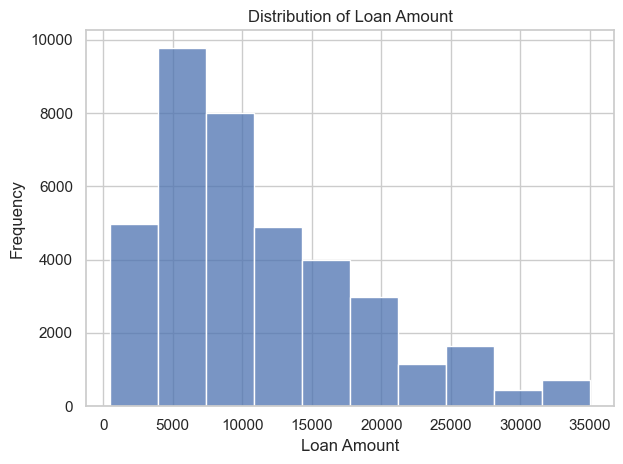

In [19]:
# Figure 1: Plot the distribution of loan amount
sns.histplot(df_cleaned["loan_amnt"], bins=10)
plt.title("Distribution of Loan Amount")
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Loan Amount Distribution Graph
- The majority of loans are concentrated in the lower to mid-range amounts, with a significant portion falling between 5,000 and 15,000.
- As seen above, the clear rightward skew shows that a smaller number of loans are for significantly higher amounts.

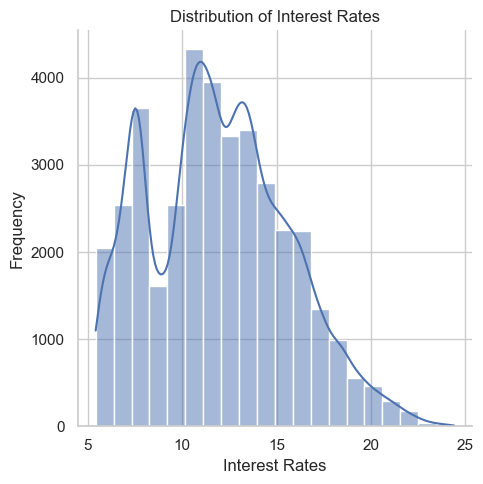

In [21]:
# Figure 2: Plot the distribution of interest rates
sns.displot(df_cleaned["int_rate"], bins=20, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel('Interest Rates')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Interest Rate Distribution Graph
- As seen above, a clear rightward skew indicates that a larger portion of loans have lower interest rates and a smaller portion of loans have higher interest rates. We need to analyze more to check if there are outliers.
- There is a noticeable peak around the 10-12% range, suggesting this is a common interest rate range for loans.

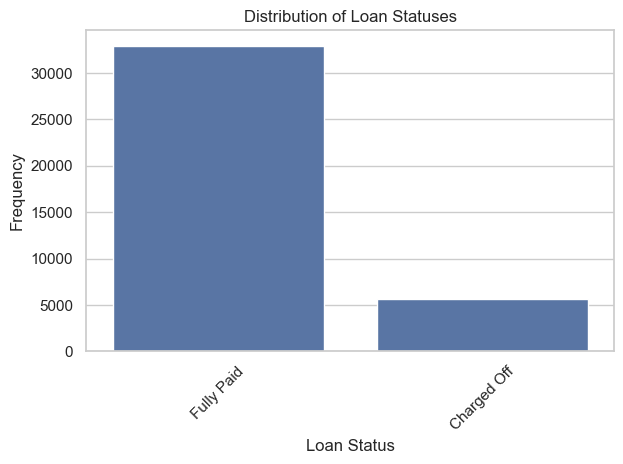

In [23]:
# Figure 3: Plot the distribution of Loan Status
sns.countplot(data=df_cleaned, x='loan_status', order=df_cleaned['loan_status'].value_counts().index)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Loan Status Distribution Graph
- A significant number of loans were fully paid, with a smaller portion being charged off, suggesting a majority of borrowers were able to repay their loans, but a considerable number defaulted.

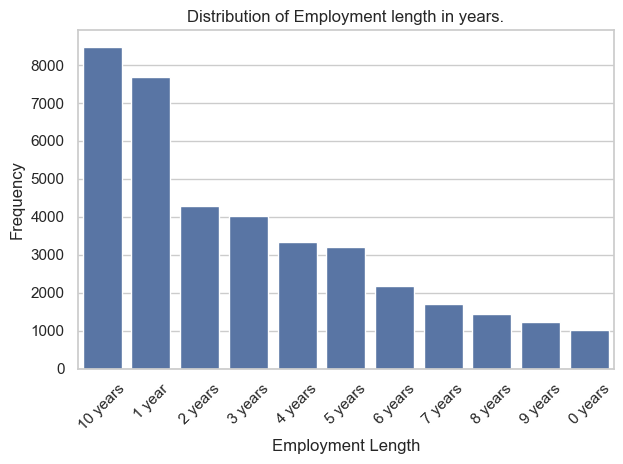

In [25]:
# Figure 4: Plot the distribution of Employment length in years
current_labels = df_cleaned['emp_length'].value_counts().index
sns.countplot(data=df_cleaned, x='emp_length', order=current_labels)
plt.title('Distribution of Employment length in years.')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
formatted_labels = [f'{label} year' if label == 1 else f'{label} years' for label in current_labels]
plt.xticks(ticks=range(len(current_labels)), labels=formatted_labels, rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Employment Length Distribution Graph
- The majority of borrowers have been employed for 10 years or for 1 year, with a significant portion having been employed for less than 5 years (6-9 years) as shown above.
- The fact that individuals with over 10 years of employment took the majority of loans, while those with 5-9 years of employment took fewer loans, suggests that lenders may view longer employment tenure as a sign of greater financial stability and lower risk. Borrowers with more stable, long-term employment are likely perceived as more capable of repaying loans, making them more attractive to lenders. Additionally, individuals with 10+ years of employment may have higher incomes and greater financial confidence, allowing them to qualify for and seek larger loan amounts.

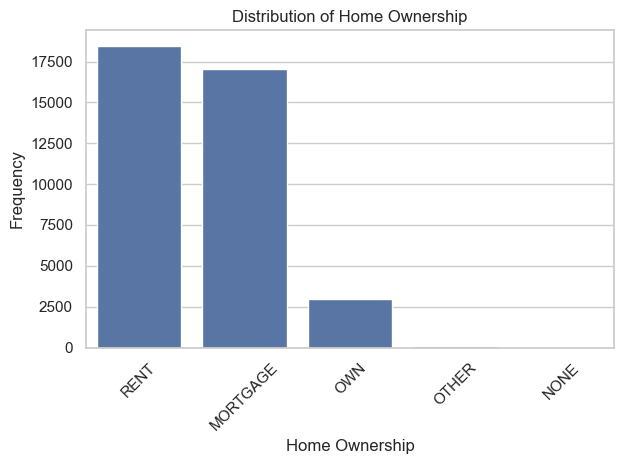

In [27]:
# Figure 5: Plot the distribution of Home Ownership
current_labels = df_cleaned['home_ownership'].value_counts().index
sns.countplot(data=df_cleaned, x='home_ownership', order=current_labels)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Home Ownership Distribution Graph 
- The majority of borrowers are renters, followed by those with a mortgage.
- A smaller portion of borrowers own their homes outright, while even fewer have other or no home ownership status.

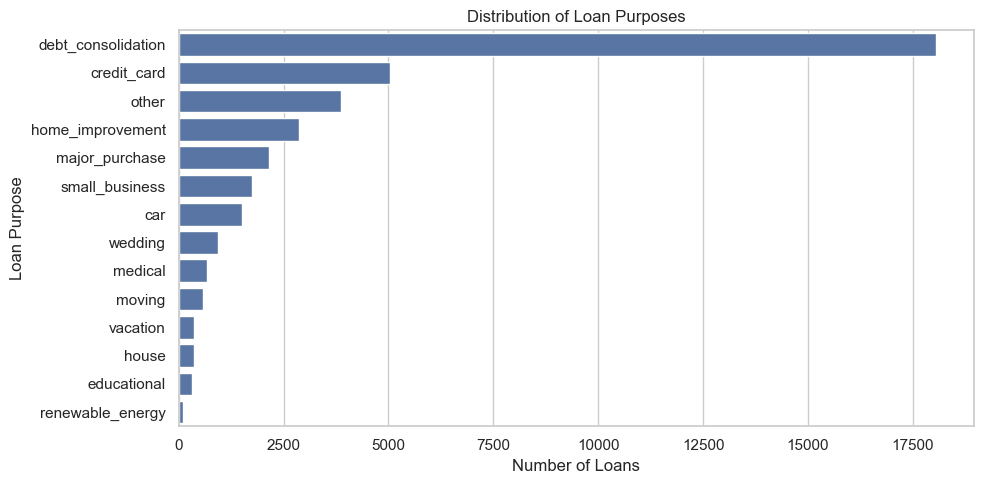

In [29]:
# Figure 6: Plot the distribution of Loan Purpose
loan_purpose_counts = df_cleaned['purpose'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_purpose_counts.values, y=loan_purpose_counts.index)
plt.title('Distribution of Loan Purposes')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Purpose')
plt.tight_layout()
plt.show()

### Insights from the Loan Purpose Distribution Graph
- Debt consolidation is the most common loan purpose, followed by credit card and other purposes.
- Home improvement, major purchases, and small businesses are also significant categories for loans.
- A variety of other purposes, such as weddings, medical expenses, moving, vacation, house, education, and renewable energy, are less frequent but still represented.

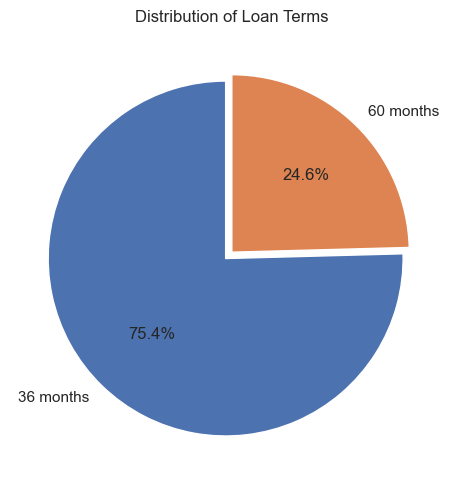

In [31]:
# Figure 7: Plot the distribution of Loan Terms
plt.figure(figsize=(5, 5))
plt.title('Distribution of Loan Terms')  
term_counts = df_cleaned.term.value_counts()
plt.pie(x=term_counts, autopct='%1.1f%%', startangle=90, explode=(0.05, 0), labels=['36 months', '60 months'])
plt.ylabel('')  
plt.tight_layout()
plt.show()

### Insights from the Loan Term Distribution Graph
- The majority of loans, 75.4% of the total, have a term of 36 months and only 24.6% of loans have a term of 60 months, suggesting the common loan term is 36 months. 

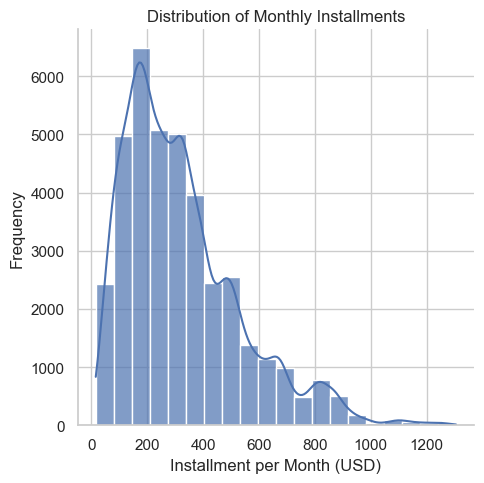

In [33]:
# Figure 8: Plot the Distribution of Monthly Installments  
sns.displot(df_cleaned["installment"], bins=20, alpha=0.7, kde=True)
plt.title('Distribution of Monthly Installments')
plt.xlabel('Installment per Month (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Monthly Installments Distribution Graph
- The distribution of monthly installments is heavily right-skewed, indicating that a larger number of borrowers have lower installment amounts.
- The most common monthly installment amount falls within 200-300 USD range.

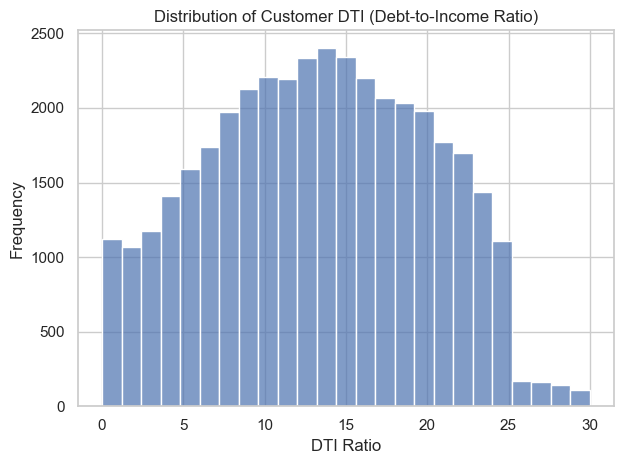

In [35]:
# Figure 9: Plot the Distribution of Customer DTI ratio
sns.histplot(df_cleaned["dti"], bins=25, alpha=0.7)
plt.title('Distribution of Customer DTI (Debt-to-Income Ratio)')  
plt.xlabel('DTI Ratio')  
plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()

### Insights from the Customer DTI Ratio Distribution Graph
- The distribution of customer DTI ratios is right-skewed. Thus a larger number of borrowers have lower DTI ratios.
- The most common DTI ratio among borrowers is 10-15 range as seen above.

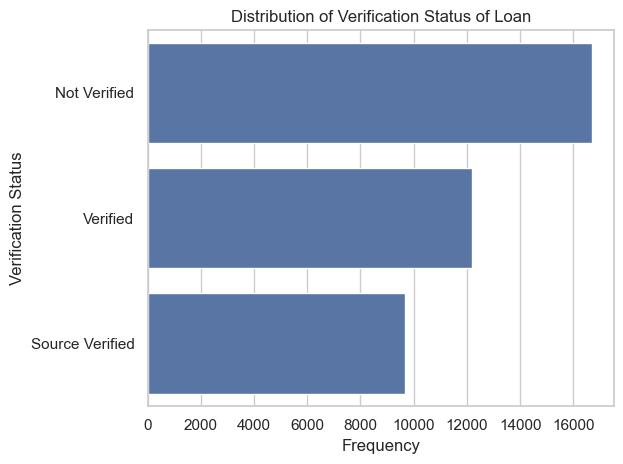

In [37]:
# Figure 10: Plot the Verification Status of Loan
verify_counts = df_cleaned["verification_status"].value_counts()
verify_labels = df_cleaned["verification_status"].value_counts().index
sns.barplot(y=verify_labels, x=verify_counts)
plt.title('Distribution of Verification Status of Loan')  
plt.xlabel('Frequency')
plt.ylabel('Verification Status')
plt.tight_layout()
plt.show()

### Insights from the Verification Status Distribution Graph
- The majority of loans were not verified, followed by verified loans. Source verified loans represent a significantly smaller portion.

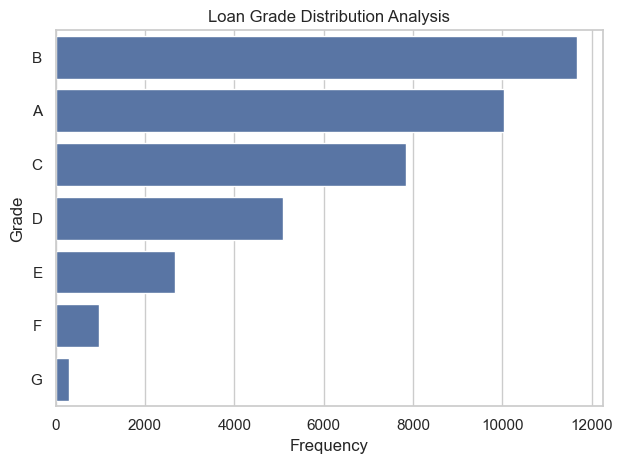

In [39]:
# Figure 11: Plot the Loan Grade Analysis
grade_counts = df_cleaned["grade"].value_counts()
grade_labels = df_cleaned["grade"].value_counts().index
sns.barplot(y=grade_labels, x=grade_counts)
plt.title('Loan Grade Distribution Analysis')
plt.xlabel('Frequency')
plt.ylabel('Grade')
plt.tight_layout()
plt.show()

### Insights from the Loan Grade Distribution Graph
- Grade B loans are the most frequent, followed by grade A loans.
- The frequency of loans decreases as the grade letter moves from D to G possibly because a higher risk is associated with lower grades.

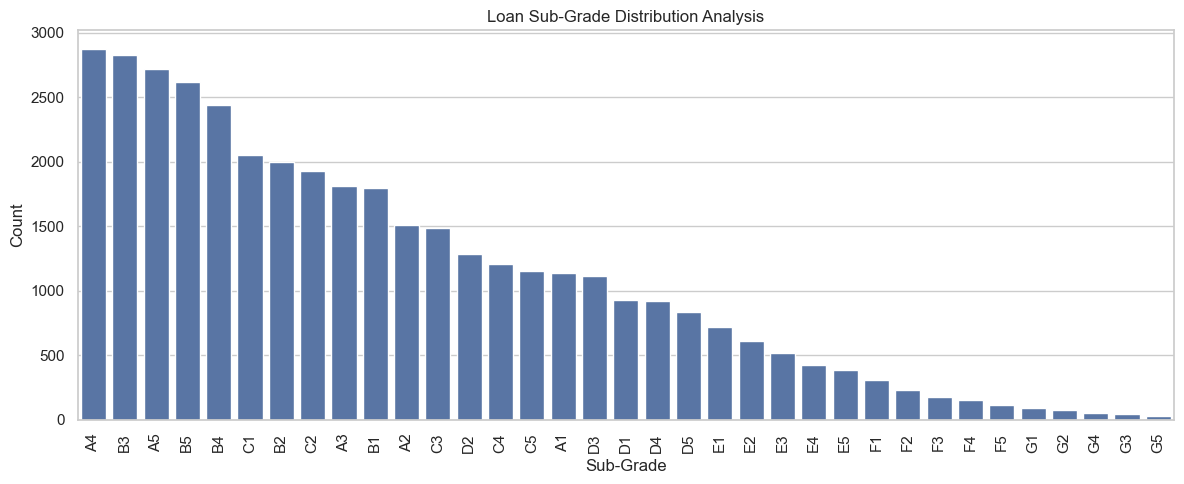

In [41]:
# Figure 12: Plot the Sub-Grade Distribution
plt.figure(figsize=[12, 5])
plt.title('Loan Sub-Grade Distribution Analysis')  
sub_grade_counts = df_cleaned["sub_grade"].value_counts()
sub_grade_labels = df_cleaned["sub_grade"].value_counts().index
sns.barplot(x=sub_grade_labels, y=sub_grade_counts)
plt.xlabel('Sub-Grade')  
plt.ylabel('Count')  
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

### Insights from the Loan Sub-Grade Distribution Graph
- The distribution of loan sub-grades is skewed to the right. A larger number of loans fall into the higher sub-grades (A1-A5).
- The most frequent sub-grade is A1, followed by B3 and A5, further emphasizing the concentration of loans in the higher sub-grades. There is a clear decrease in the number of loans as the sub-grade moves from A1 to G5 as seen above.

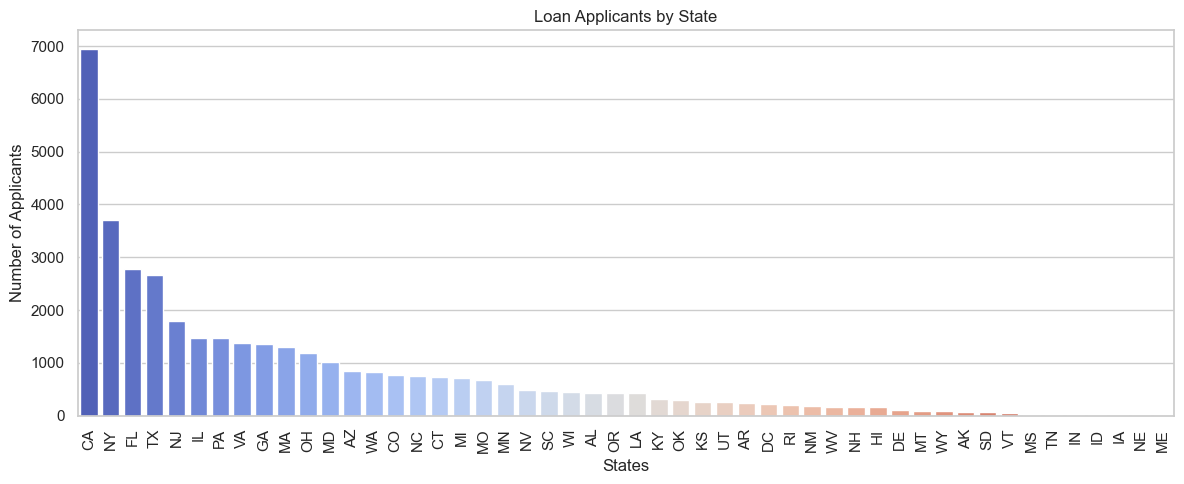

In [43]:
# Figure 13: Plot the State Distribution for Loan Applicants
plt.figure(figsize=[12, 5])
plt.title('Loan Applicants by State')
sns.countplot(x=df_cleaned["addr_state"], palette='coolwarm', order=df_cleaned["addr_state"].value_counts().index)
plt.xlabel('States')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights from the Loan Applicants by State Distribution Graph
- California (CA) has the highest number of loan applicants, followed by New York (NY) and Florida (FL).

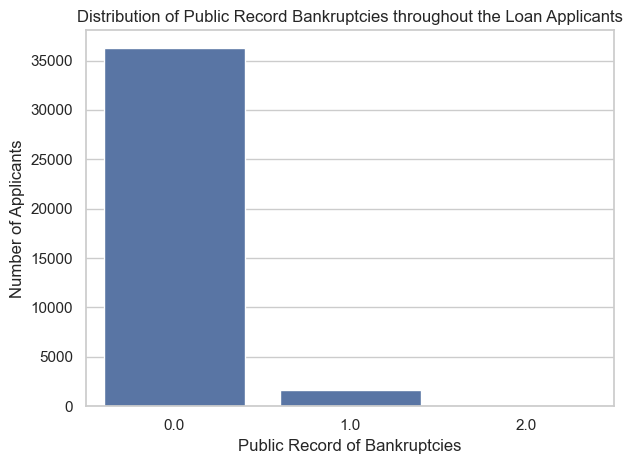

In [45]:
# Figure 14: Plot the Public Record Bankruptcies Distribution for Loan Applicants
plt.title('Distribution of Public Record Bankruptcies throughout the Loan Applicants')
sns.countplot(data=df_cleaned, x="pub_rec_bankruptcies", order=df_cleaned["pub_rec_bankruptcies"].value_counts().index)
plt.xlabel('Public Record of Bankruptcies')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

### Insights from the Public Record Bankruptcies Distribution Graph
- The vast majority of loan applicants have no public record bankruptcies. Only a small number of applicants have one or two public record bankruptcies.
- Bankruptcies are a relatively rare occurrence among the loan applicants in this dataset.

### Key Insights from the Univariate Analysis of Loan Data
- Loan Amounts: The majority of loans are for lower to mid-range amounts, with a significant portion falling between 5,000 and 15,000. There is a clear rightward skew, indicating larger loans are less frequent.
- Interest Rates: Interest rates are generally lower, with a noticeable peak around 10-12%. The distribution is skewed to the right, indicating more loans have lower rates.
- Loan Statuses: Most loans were fully paid, but a considerable number were charged off.
- Employment Length: Borrowers tend to have shorter employment lengths, with most employed for 10 years or less.
- Home Ownership: Renters are the most common, followed by mortgage holders. Homeowners are a smaller group.
- Loan Purposes: Debt consolidation is the primary purpose, followed by credit cards and home improvements.
- Loan Terms: 36-month terms are significantly more common than 60-month terms.
- Customer DTI: Borrowers generally have lower DTI ratios, with a peak around 10-15.
- Monthly Installments: Most borrowers have lower monthly installments, with a peak around 200-300 USD.
- Verification Status: Many loans are not verified, while some are verified or source verified.
- Loan Grades: Higher grades (A-B) are more common than lower grades (C-G), indicating lower risk borrowers.
- Loan Sub-Grades: The distribution of sub-grades is skewed to the right.
- State Distribution: California, New York, and Florida have the highest number of loan applicants, with most states having fewer than 1,000 applicants.
- Public Record Bankruptcies: Very few applicants have public record bankruptcies, with the majority having none.

## Segmented Univariate and Bivariate Analysis

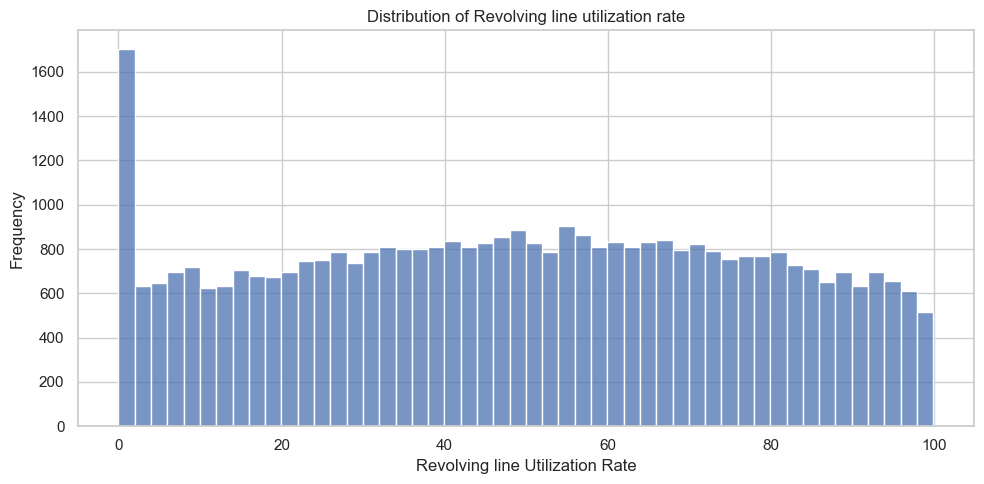

In [49]:
# Figure 15: Plot the Distribution of Revolving line utilization rate
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned["revol_util"], bins=50)
plt.title('Distribution of Revolving line utilization rate')
plt.xlabel('Revolving line Utilization Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from Revolving Line Utilization Rate Distribution Graph

- The majority of customers have a revolving line utilization rate of 0, indicating a relatively low usage of their credit lines.
- The distribution is skewed to the right, with a longer tail on the higher utilization rates, suggesting a smaller proportion of customers have very high credit line usage. Lenders favor borrowers with a credit utilization ratio of 30% and below, with the 1% to 10% range considered ideal.

In [51]:
# Segmenting Interest Rates into Low, Medium and High Interest Rates
df_cleaned['int_rate_segments'] = pd.qcut(x=df_cleaned.int_rate, q=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

# Segmenting Annual Incomes into Tier 1, Tier2 and Tier 3 Annual Incomes
# Tier 1 = Low Income, Tier 2 = Medium Income, Tier 3 = High Income
df_cleaned['annual_inc_segments'] = pd.qcut(x=df_cleaned.annual_inc, q=[0, 0.33, 0.66, 1], labels=["Tier 1", "Tier 2", "Tier 3"])

# Segmenting Revolving line utilization rate into Low, Medium and High Utilization
# Based on Figure 15: Plot the Distribution of the Revolving line utilization rate, which shows a right-skewed distribution  
# with a concentration of values around 0-10, median imputation would be a suitable approach 
# for handling missing values in the revol_util column.
df_cleaned['util_status'] = pd.qcut(df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median()), q=[0, 0.33, 0.66, 1], 
                                    labels=['Low Utilization', 'Moderate Utilization', 'High Utilization'])


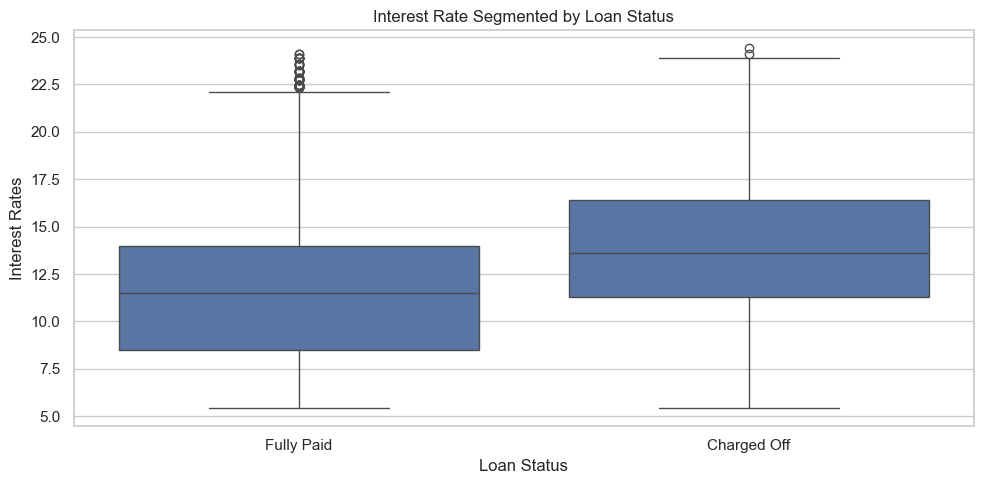

In [52]:
# Figure 16: Plot the Interest Rate Segmented by Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, y="int_rate" , x="loan_status")
plt.title("Interest Rate Segmented by Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Interest Rates')
plt.tight_layout()
plt.show()

### Insights from Interest Rate Segmented by Loan Status Graph

- Interest rates for fully paid loans are generally lower than those for charged-off loans, indicating a correlation between higher interest rates and increased risk of default or inability to pay the huge amount for loan.
- The variability in interest rates for charged-off loans is higher, suggesting a wider range of interest rates are applied to loans that ultimately default.

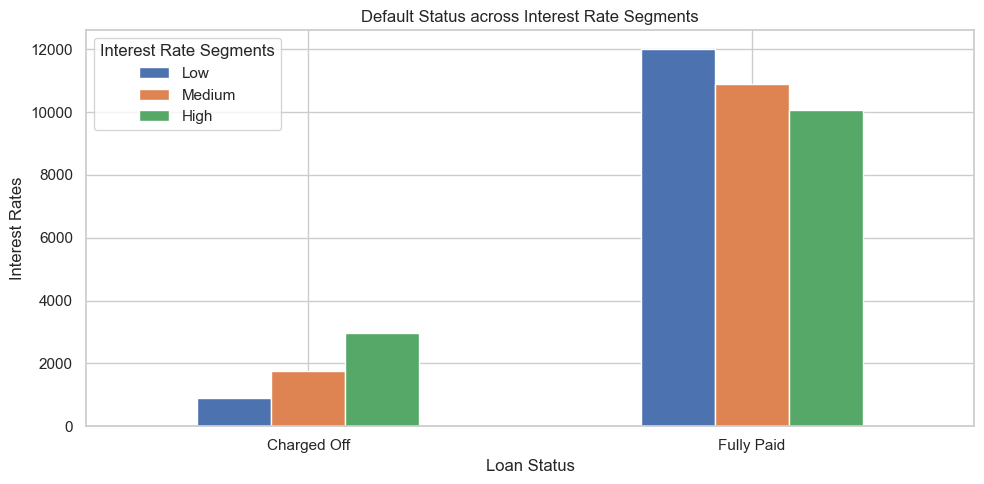

In [54]:
# Figure 17: Plot the Loan Status across Interest Rate Segments
df_cleaned.groupby('loan_status')['int_rate_segments'].value_counts().unstack().plot(kind='bar', figsize = (10,5))
plt.title("Default Status across Interest Rate Segments")
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rates')
plt.legend(title = "Interest Rate Segments")
plt.tight_layout()
plt.show()

### Insights from Default Status across Interest Rate Segments Graph

- The number of charged-off loans significantly increases with higher interest rate segments, suggesting a strong correlation between interest rates and default risk.
- While the majority of loans in the low interest rate segment are fully paid, a noticeable proportion still default, highlighting the importance of other factors beyond interest rates in determining loan outcomes.

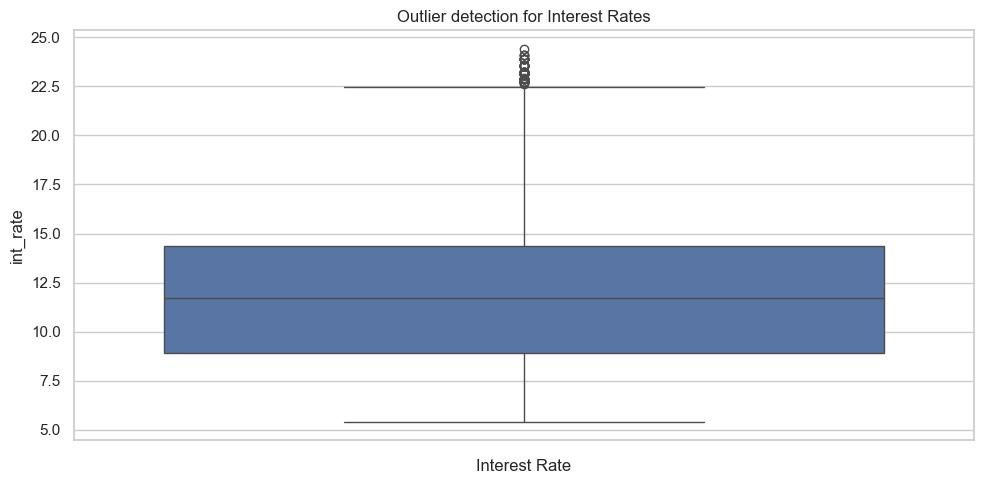

In [56]:
# Figure 18: Outlier detection for Interest Rates
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, y="int_rate")
plt.title("Outlier detection for Interest Rates")
plt.xlabel("Interest Rate")
plt.tight_layout()
plt.show()

### Insights from Outlier Detection for Interest Rates Graph

- The boxplot reveals several outliers, primarily on the higher interest rate side, indicating that a small number of loans have interest rates significantly deviating from the majority.

In [58]:
# As we observed from Figure 3: Outlier detection for Interest Rates
# that interest rates have outliers. We are removing the interest rates greater than 22.
df_cleaned = df_cleaned[df_cleaned['int_rate'] < 22]

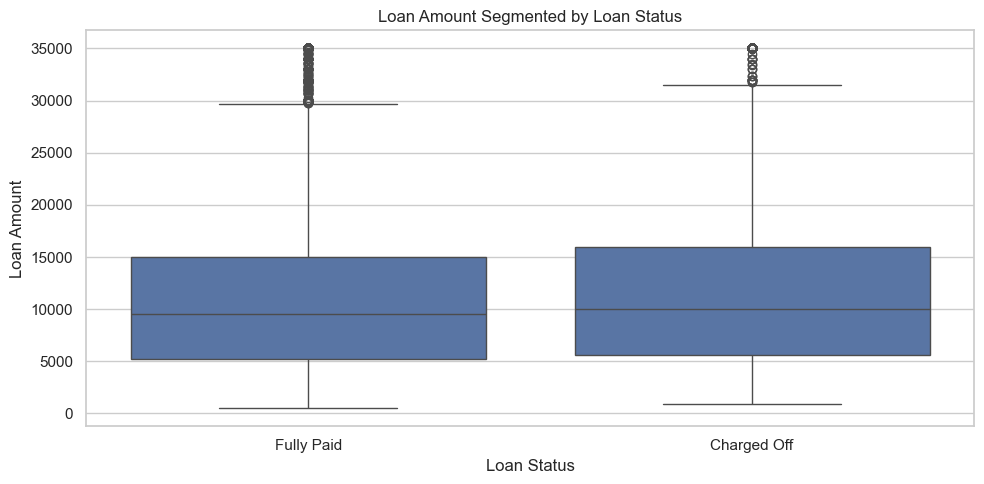

In [59]:
# Figure 19: Plot the Loan Amount by Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, x='loan_status', y='loan_amnt')
plt.title('Loan Amount Segmented by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

### Insights from Loan Amount Segmented by Loan Status Graph

- The median loan amount for fully paid loans is slightly lower than that for charged-off loans, suggesting a potential relationship between higher loan amounts and increased risk of default.
- The variability in loan amounts is generally higher for charged-off loans, indicating a wider range of loan sizes among defaulted loans compared to fully paid loans.

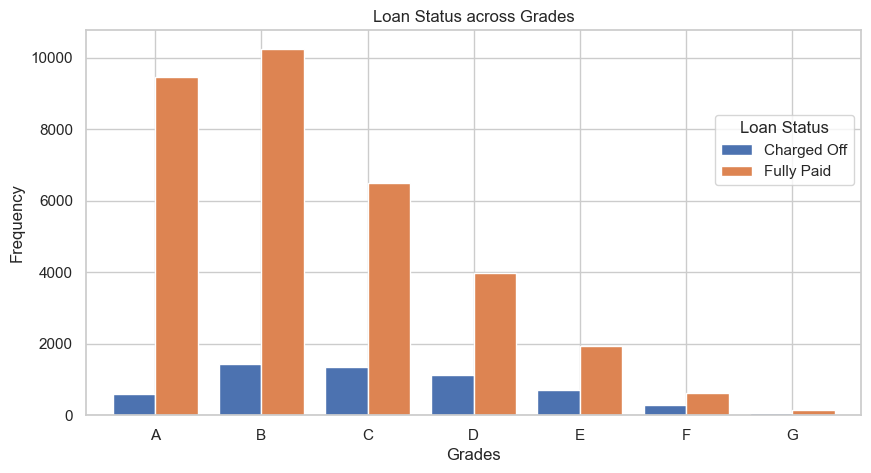

In [61]:
# Figure 20: Plot the Grade segmented by Loan Status
df_cleaned.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=[10,5])
plt.title("Loan Status across Grades")
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.legend(title = "Loan Status", bbox_to_anchor=[1,0.8])
plt.xticks(rotation=0)
plt.show()

### Insights from Loan Status across Grades Graph

- While the majority of loans in the higher grades (A-B) are fully paid, a noticeable proportion still default, indicating that other factors beyond loan grade influence loan outcomes.
- As seen above Grade B, C, D, E and A have the default rates in decreasing order with higher default rates for Grade B and lowest with Grade G, F and A.

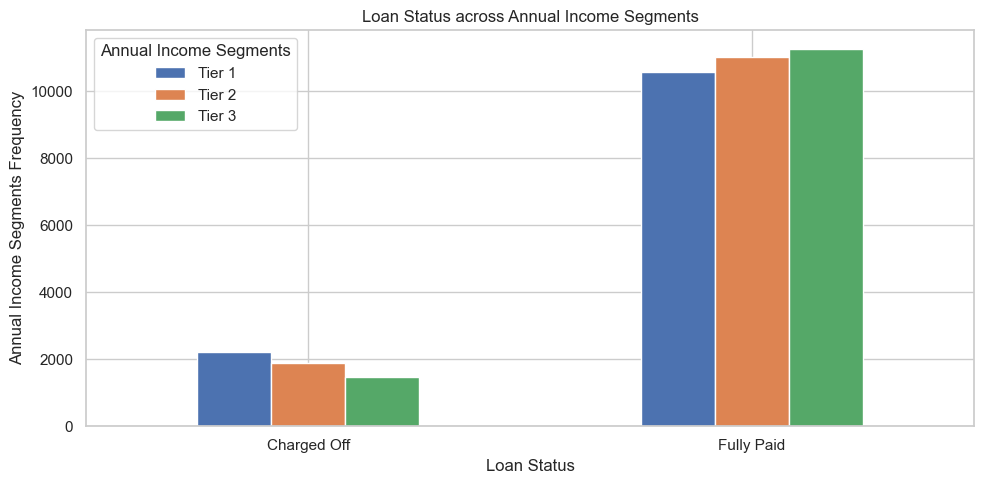

In [63]:
# Figure 21: Plot the Annual Income Segmented by Loan Status
df_cleaned.groupby('loan_status')['annual_inc_segments'].value_counts().unstack().plot(kind='bar', figsize=[10,5])
plt.title("Loan Status across Annual Income Segments")
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income Segments Frequency')
plt.legend(title = "Annual Income Segments")
plt.tight_layout()
plt.show()

### Insights from Loan Status across Annual Income Segments Graph

- The number of charged-off loans decreases with increase in different annual income tiers, suggesting that borrowers with Income tier 3 are less likely to default than borrowers with Tier 1 and Tier 2 income segments. Here Tier 1 indicates lower income segments and Tier 3 as higher income segments. 

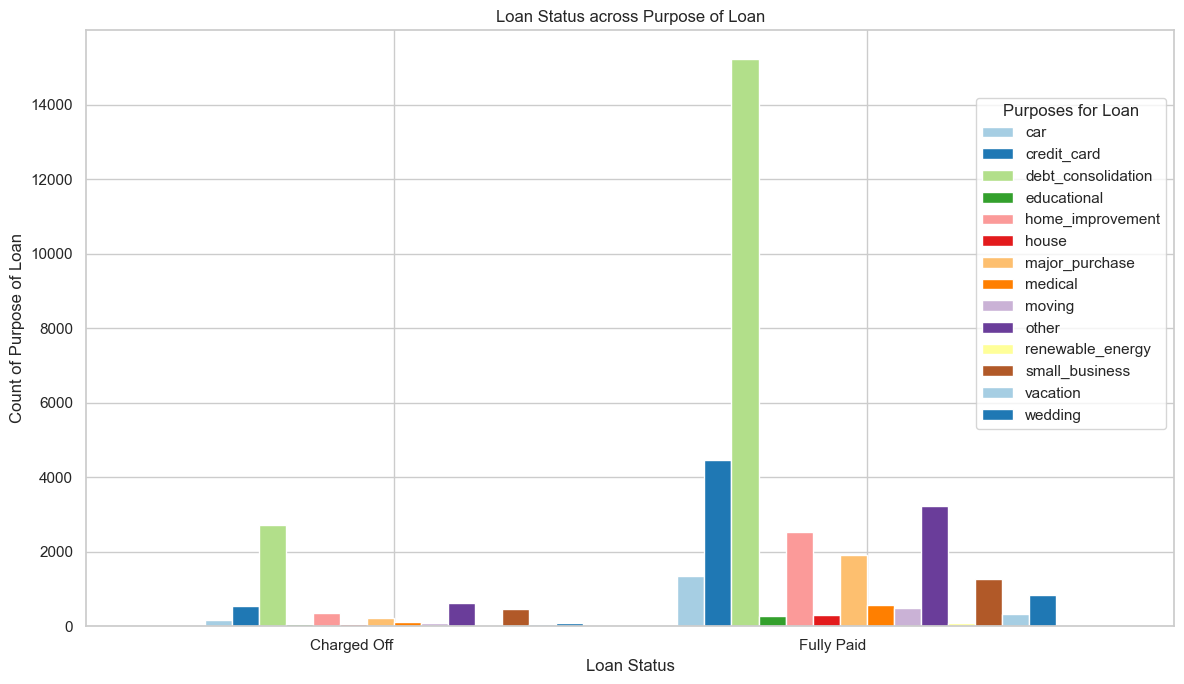

In [65]:
# Figure 22: Plot the Purpose of Loan Segmented by Loan Status
sns.set_palette("Paired")
df_cleaned.groupby('loan_status')['purpose'].value_counts().unstack().plot(kind='bar', stacked= False, width=0.8, figsize=[12,7])
plt.title('Loan Status across Purpose of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count of Purpose of Loan')
plt.xticks(rotation=0, ha='right')
plt.legend(title="Purposes for Loan", bbox_to_anchor=[1,0.9])
plt.tight_layout()
plt.show()

### Insights from Loan Status across Purpose of Loan Graph

- The purpose of the loan significantly impacts the likelihood of default. Loans for debt consolidation, credit card, home improvement, and major purchases have the highest rates of charge-offs, while loans for medical expenses and education have the lowest. This suggests that borrowers with purpose of debt consolidation and Credit card have a higher risk of default. 

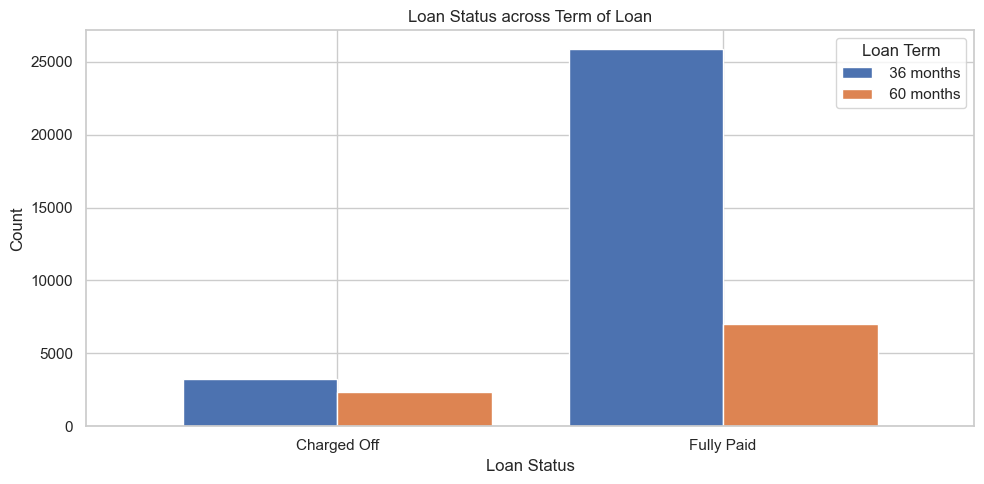

In [67]:
# Figure 23: Plot the graph between Loan_Status and Term of the loan
sns.set_palette("deep")
df_cleaned.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status across Term of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Loan Term')
plt.tight_layout()
plt.show()

### Insights from Loan Status across Term of Loan Graph

- The term of the loan significantly impacts the likelihood of default. Loans with a 60-month term have a significantly lower rate of charge-offs compared to those with a 36-month term.

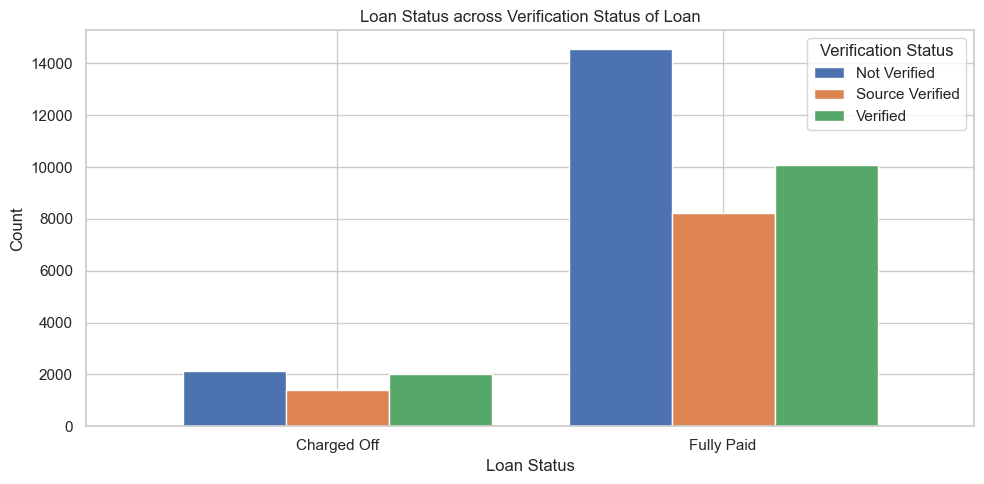

In [69]:
# Figure 24: Plot the graph between Loan_Status and Verification Status
df_cleaned.groupby('loan_status')['verification_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status across Verification Status of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Verification Status')
plt.tight_layout()
plt.show()

### Insights from Loan Status across Verification Status of Loan Graph

- Verification status has a significant impact on loan default rates. Loans with no verification have the highest default rate, followed by verified loans, while source verified loans have the lowest.
- While the majority of loans in all verification categories are fully paid, the difference in default rates is substantial, highlighting the importance of verification in assessing loan risk.

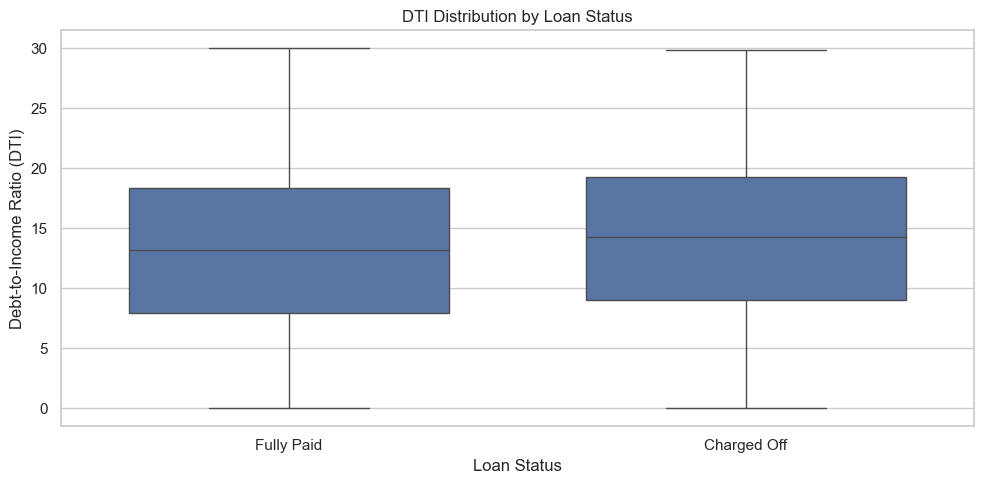

In [71]:
# Figure 25: Plot the graph between Loan_Status and DTI (Debt-to-Income ratio)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x="loan_status", y="dti", width=0.7)
plt.title('DTI Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insights from DTI Distribution by Loan Status Graph

- The median DTI ratio for fully paid loans is slightly lower than that for charged-off loans, suggesting a potential relationship between higher DTI ratios and increased risk of default.
- The variability in DTI ratios is generally higher for charged-off loans, indicating a wider range of DTI ratios among defaulted loans.

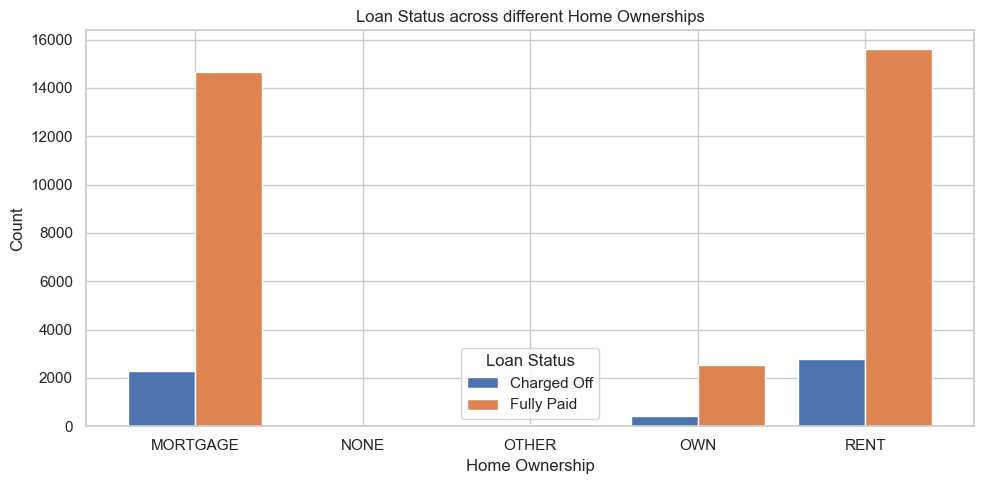

In [73]:
# Figure 25: Plot the graph between Loan_Status and Home Ownership
df_cleaned.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title("Loan Status across different Home Ownerships")
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

### Insights from Loan Status across Different Home Ownership Graph

- Homeownership significantly impacts loan default rates. Borrowers who own a house have the lowest default rate, followed by those who pay a mortgage on their home, while those who rent have significantly higher default rates.

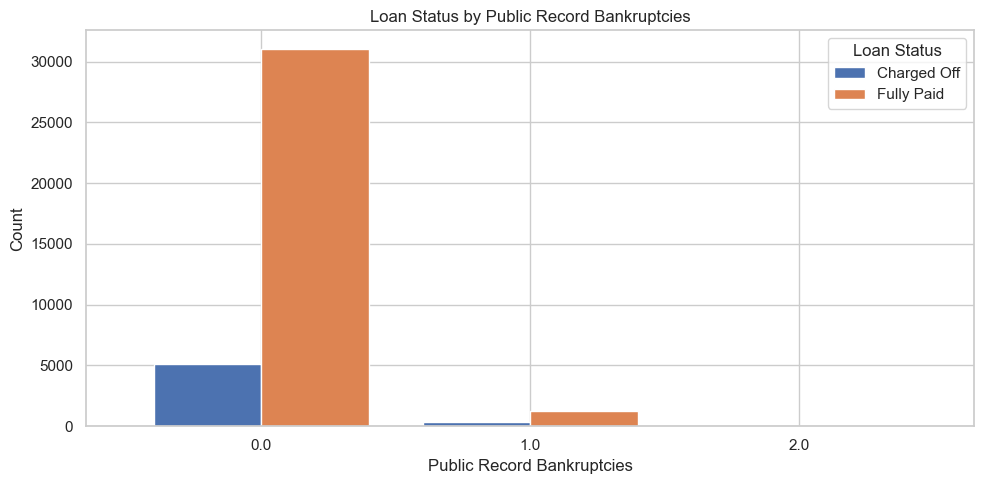

In [75]:
# Figure 26: Plot the graph between Loan_Status and Public Record of Bankruptcies
df_cleaned.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status by Public Record Bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

### Insights from Loan Status by Public Record Bankruptcies Graph

- Borrowers with a higher number of public record bankruptcies actually have a lower rate of charge-offs. This suggests that other factors, perhaps related to credit recovery or rehabilitation efforts, might be influencing the outcomes for borrowers with bankruptcies.

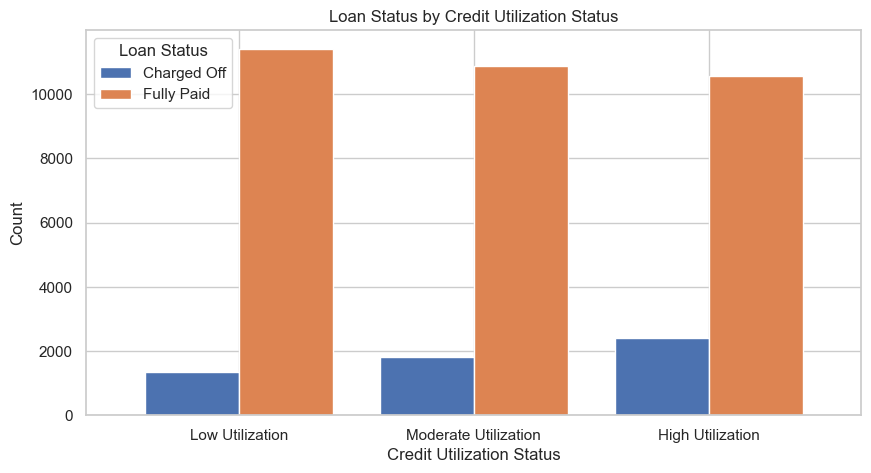

In [77]:
# Figure 27: Plot the graph between Loan_Status and Revolving Line of Credit Utilization
df_cleaned.groupby('util_status')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status by Credit Utilization Status')
plt.xlabel('Credit Utilization Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()

### Insights from Loan Status by Credit Utilization Graph

- Credit utilization status has a significant impact on loan default rates. Borrowers with low credit utilization have the lowest default rate, followed by moderate utilization, while high utilization is associated with the highest default rate.

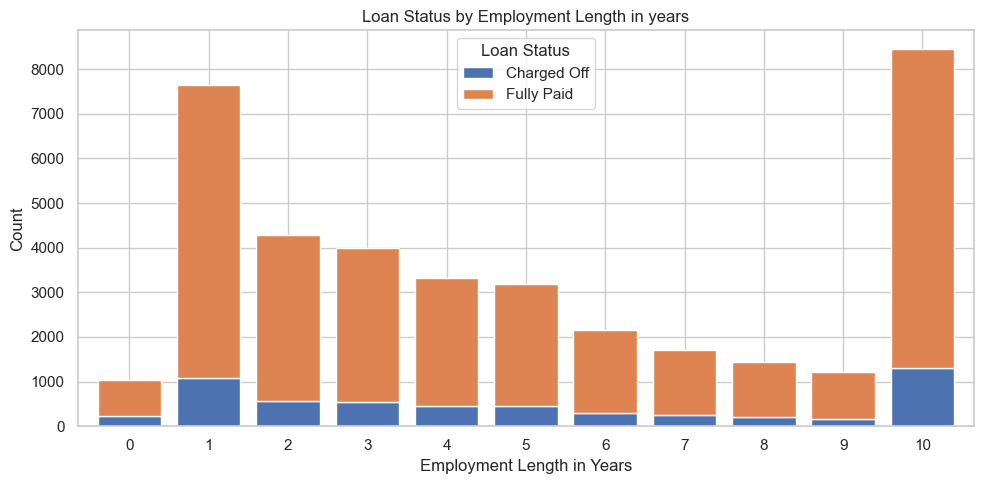

In [79]:
# Figure 28: Plot the graph between Loan_Status and Employment Length in years
df_cleaned.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=True, width=0.8, figsize=(10, 5))
plt.title('Loan Status by Employment Length in years')
plt.xlabel('Employment Length in Years')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

### Insights from Loan Status by Employment Length in Years Graph

- Borrowers with shorter employment lengths (0, 2-9 years) have a significantly lower rate of charge-offs compared to those with 10+ and 1 year of employment. Borrowers with 10+ years of employment still have the highest rate of fully paying the loans as well.

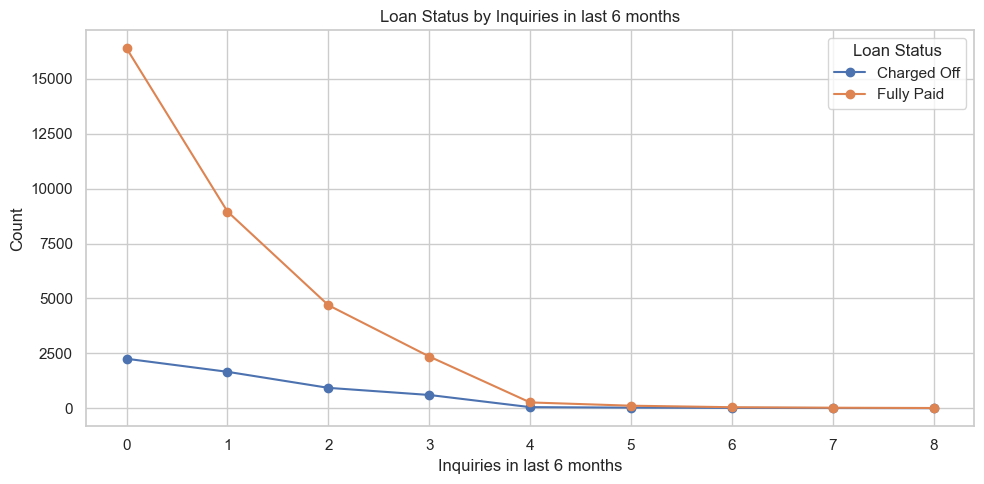

In [81]:
# Figure 29: Plot the graph between Loan_Status and Inquiries in Last 6 Months
df_cleaned.groupby('inq_last_6mths')['loan_status'].value_counts().unstack().plot(marker='o', figsize=(10, 5))
plt.title('Loan Status by Inquiries in last 6 months')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

### Insights from Loan Status by Inquiries in the Last 6 Months Graph

- A higher number of inquiries in the last 6 months is generally associated with a higher rate of charge-offs.
- The relationship between inquiries and default is most pronounced for 0-3 inquiries. As the number of inquiries increases beyond 3, the default rate tends to stabilize or decrease slightly.
- While having a few inquiries might not significantly increase the risk of default, a larger number of inquiries could be a risk.

### Key Insights from the Segmented Univariate and Bivariate Analysis of Loan Data
Loan Status:
- Interest Rates: Higher interest rates are associated with an increased risk of default.
- Loan Amounts: Larger loan amounts are associated with an increased risk of default.
- Loan Grades: While the majority of loans in the higher grades (A-B) are fully paid, a noticeable proportion still default, indicating that other factors beyond loan grade influence loan outcomes.
- Loan Purpose: Loans for debt consolidation, others, credit card and home improvement and major purchases have higher default rates.
- Loan Term: Loan terms of (36 months) are associated with higher default rates.
- Public Record Bankruptcies: Surprisingly, having public record bankruptcies is not a strong predictor of default.
- Credit Utilization: Higher credit utilization is associated with increased risk of default.
- Employment Length: Shorter employment lengths with (0, 2-9 years) have a significantly lower rate of charge-offs compared to those with 10+ and 1 year of employment.
- Annual Income: The number of charged-off loans decreases with increase in different annual income tiers, suggesting that borrowers with Income tier 3 are less likely to default than borrowers with Tier 1 and Tier 2 income segments.
- Home Ownership: Borrowers who own a house have the lowest default rate, followed by those who pay mortgage their home, while those who rent have significantly higher default rates.

Overall:
- Multiple factors contribute to loan default risk.
- Interest rates, loan amounts, loan grades, loan purpose, loan term, credit utilization, home ownership and employmentt length are particularly influential.
- While public record bankruptcies might be expected to increase default risk, this analysis suggests that other factors might be more significant.
- While having a few inquiries might not significantly increase the risk of default, a larger number of inquiries could be a risk.

## Multivariate Analysis

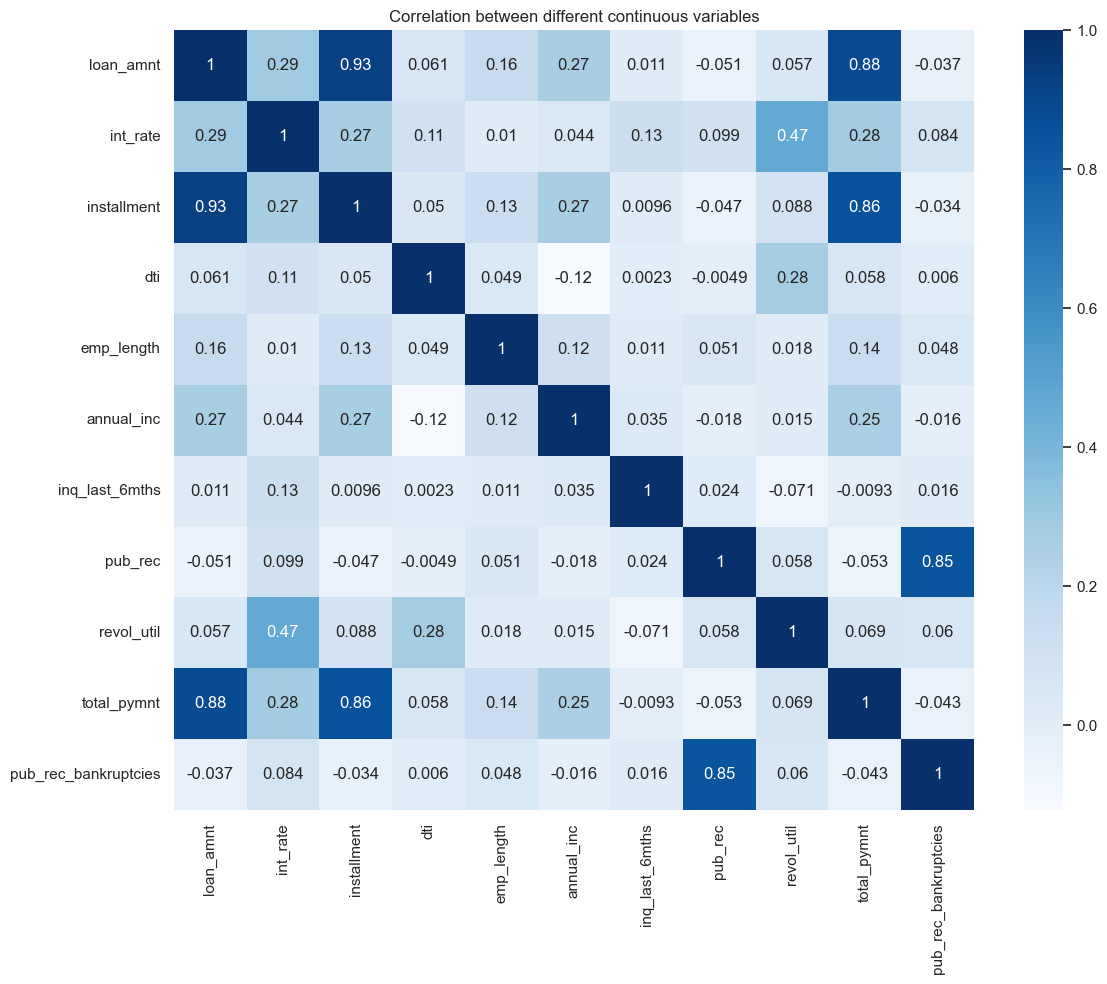

In [85]:
# Figure 30: Plot the Correlation between different continuous variables
# Using the correlation matrix and plotting the heatmap to understand the correction between selective continuos variables
selected_columns = ["loan_amnt","int_rate", "installment", "dti", "emp_length", "annual_inc", "inq_last_6mths",
                   "pub_rec", "revol_util", "total_pymnt", "pub_rec_bankruptcies"]
corr = df_cleaned[selected_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.color_palette("Blues", as_cmap=True))
plt.title('Correlation between different continuous variables')
plt.tight_layout()
plt.show()

### Insights from Correlation between different continuous variables graph
##### Strong Positive Correlations:
- Loan Amount and Installment: These two variables are likely to have a strong positive correlation, indicating that higher loan amounts are associated with higher installment payments.
- Total Payment and Loan Amount: A high correlation here suggests that larger loans result in higher total payments over time.

##### Moderate Positive Correlations:
- Annual Income and Loan Amount: This correlation indicates that individuals with higher annual incomes tend to take out larger loans.
- Interest Rate and Installment: A moderate positive correlation might suggest that higher interest rates lead to higher installment amounts.

##### Weak or No Correlations:
- Employment Length and Most Other Variables: Employment length might show weak correlations with other financial variables, indicating that it doesn't strongly influence loan amounts, interest rates, or other factors in this dataset.

##### Negative Correlations:
- Debt-to-Income Ratio (DTI) and Annual Income: A negative correlation here would suggest that as annual income increases, the debt-to-income ratio tends to decrease, which makes sense as higher income can reduce the relative burden of debt.

##### Other Notable Correlations:
- Revolving Utilization and Interest Rate: If there's a positive correlation, it could indicate that higher revolving credit utilization is associated with higher interest rates.
- Public Records and Bankruptcies: A positive correlation between these variables would be expected, as more public records often indicate a higher likelihood of bankruptcies.

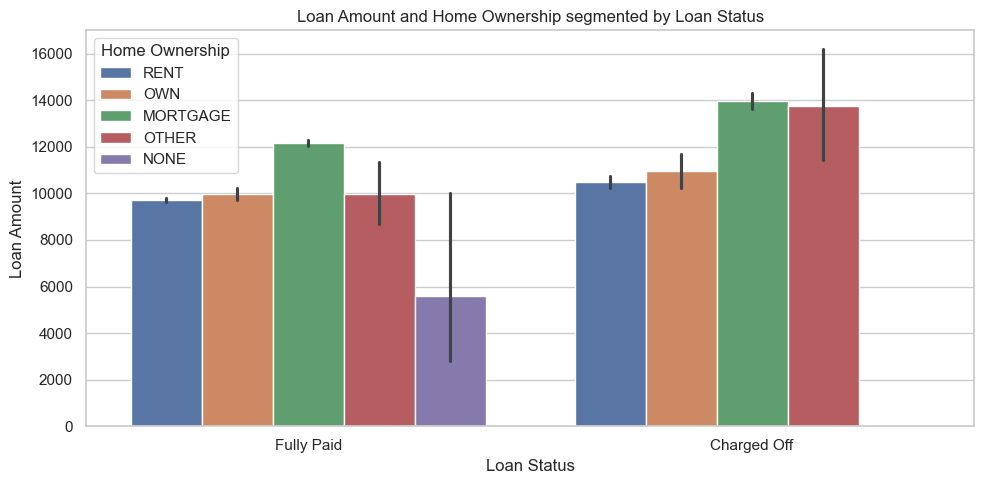

In [87]:
# Figure 31: Loan Amount and Home Ownership in Years segmented by Loan Status
sns.set_palette("deep")
plt.figure(figsize=[10,5])
sns.barplot(data=df_cleaned, x="loan_status", y="loan_amnt", hue='home_ownership', orient="vertical")
plt.title('Loan Amount and Home Ownership segmented by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=0)
plt.legend(title="Home Ownership")
plt.tight_layout()
plt.show()

### Insights from Loan Amount and Home Ownership Graph
- Fully Paid Loans: Generally, individuals with higher loan amounts have home ownership statuses like 'MORTGAGE' or 'OWN', suggesting a stable financial foundation.
- Charged Off Loans: Borrowers with 'RENT' or 'NONE' home ownership statuses are more likely to default on their loans, indicating a potential correlation between homeownership and loan repayment.
- Loan Amount Distribution: The distribution of loan amounts varies across home ownership categories. For example, borrowers with 'MORTGAGE' tend to have higher loan amounts compared to those with 'RENT' or 'NONE'.
- Home Ownership Impact: Home ownership appears to influence loan repayment. Individuals with stable homeownership statuses (e.g., 'MORTGAGE', 'OWN') are more likely to repay their loans in full.

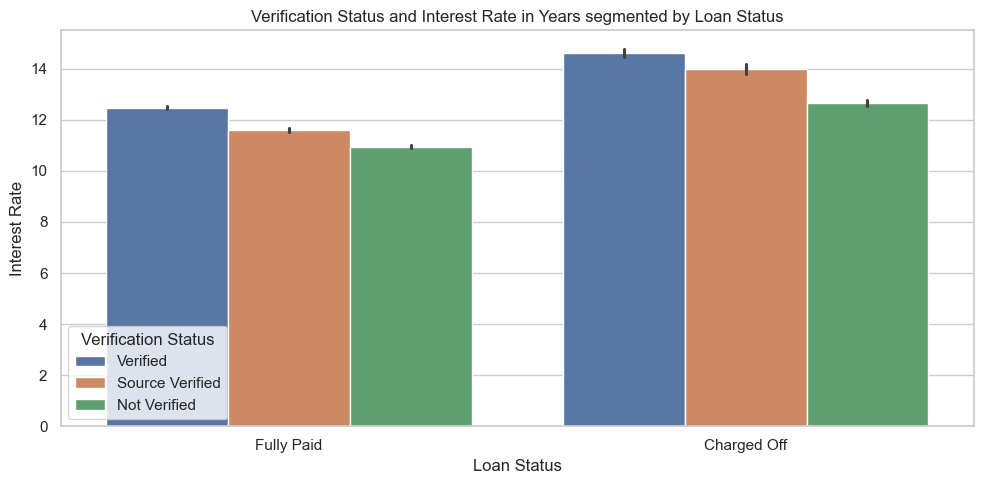

In [89]:
# Figure 32: Verification Status and Interest Rate in Years segmented by Loan Status
sns.set_palette("deep")
plt.figure(figsize=[10,5])
sns.barplot(data=df_cleaned, x="loan_status", y="int_rate", hue='verification_status')
plt.title('Verification Status and Interest Rate in Years segmented by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=0)
plt.legend(title="Verification Status")
plt.tight_layout()
plt.show()

### Insights from Verification Status and Interest Rate Graph
- Fully Paid Loans: 'Verified' borrowers tend to have slightly higher interest rates compared to 'Source Verified' or 'Not Verified' borrowers.
- Charged Off Loans: 'Not Verified' borrowers have the highest interest rates, suggesting a potential correlation between verification status and loan default risk.
- Interest Rate Differences: Interest rates vary across verification statuses, with 'Verified' borrowers generally having higher rates than 'Source Verified' or 'Not Verified' borrowers.
- Verification Impact: Verification status appears to influence interest rates, with 'Verified' borrowers potentially facing higher rates due to a perceived lower risk profile.

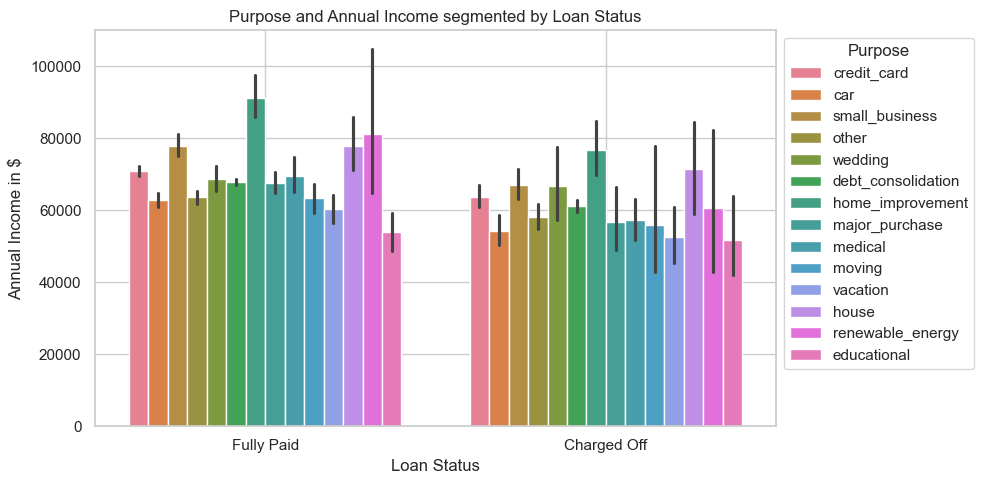

In [91]:
# Figure 33: Purpose and Annual Income segmented by Loan Status
sns.set_palette("deep")
plt.figure(figsize=[10,5])
sns.barplot(data=df_cleaned, x="loan_status", y="annual_inc", hue='purpose')
plt.title('Purpose and Annual Income segmented by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income in $')
plt.xticks(rotation=0)
plt.legend(title="Purpose", bbox_to_anchor=[1,1])
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from Purpose and Annual Income Graph
- Purpose and Loan Repayment: The purpose of the loan seems to influence repayment rates. Loans for 'credit_card' and 'car' have higher repayment rates, while those for 'small_business' and 'debt_consolidation' have lower rates.
- Annual Income and Loan Status: Borrowers with higher annual incomes are more likely to repay their loans in full, especially for purposes like 'home_improvement' and 'house'.
- Loan Purpose Distribution: The distribution of loan purposes varies between fully paid and charged-off loans. For example, 'credit_card' and 'car' loans are more common among fully paid borrowers, while 'small_business' and 'debt_consolidation' loans are more frequent among charged-off borrowers.
- Income Impact: Higher annual income appears to be a positive factor in loan repayment, particularly for certain loan purposes.

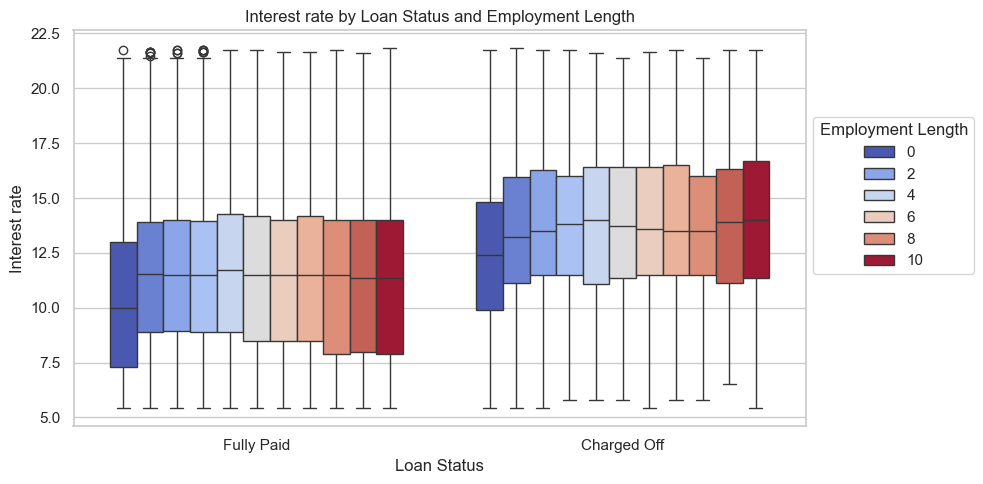

In [93]:
# Figure 34: Loan Status by Interest Rate and Employment Length
plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_status', y='int_rate', hue='emp_length', data=df_cleaned, palette='coolwarm')
plt.title('Interest rate by Loan Status and Employment Length')
plt.xlabel('Loan Status')
plt.ylabel('Interest rate')
plt.legend(bbox_to_anchor=[1,0.8], title="Employment Length")
plt.tight_layout()
plt.show()

### Insights from Loan Amount by Loan Status and Employment Length Graph

- Interest rates across loan statuses: The boxplot reveals that interest rates for "Charged Off" loans are generally higher than those for "Fully Paid" loans, suggesting a correlation between higher interest rates and increased risk of default.
- Employment length's influence on interest rates: The varying boxplot widths and distributions across different employment lengths indicate that interest rates are influenced by employment duration. While a longer employment history might lead to lower rates in some cases, it's not a uniform trend, suggesting other factors play a role.

# Summary of Key Findings

## Key Correlations:

1. *Loan Amount and Installment*: A strong positive correlation exists between loan amount and installment payments, indicating that larger loans necessitate higher monthly payments.
   
2. *Total Payment and Loan Amount*: Borrowers with larger loan amounts tend to have significantly higher total payment obligations over the life of the loan.

3. *Annual Income and Loan Amount*: Applicants with higher annual incomes are more likely to secure larger loans, reflecting lenders' confidence in their repayment ability.

4. *Interest Rate and Installment*: Elevated interest rates directly influence the size of installment payments, resulting in higher monthly costs for borrowers with higher rates.

5. *Debt-to-Income Ratio and Annual Income*: Higher-income individuals generally maintain lower debt-to-income ratios, signifying stronger financial health and borrowing capacity.

6. *Revolving Utilization and Interest Rate*: A higher revolving credit utilization rate correlates with increased interest rates, indicating heightened lending risk.

7. *Public Records and Bankruptcies*: The presence of public records, such as tax liens or judgments, is strongly associated with a higher likelihood of bankruptcy filings.

## Loan Defaults:

1. *Home Ownership*: Borrowers who rent or lack homeownership exhibit a notably higher propensity to default compared to homeowners.

2. *Loan Purpose*: Loans taken for high-risk purposes like 'small_business' or 'debt_consolidation' demonstrate elevated default rates.

3. *Annual Income*: Borrowers with lower income levels are disproportionately prone to default, emphasizing the risk associated with lending to financially constrained individuals.

4. *Verification Status*: Loans issued to borrowers with 'Not Verified' income or employment status show significantly higher default rates, indicating the critical importance of verification.

5. *Employment Length*: Shorter employment tenure is associated with a higher likelihood of default, as job stability directly impacts borrowers' ability to meet financial obligations.

---

# Recommendations to Mitigate Charge-offs:

1. *Enhance Credit Scoring Models*: Integrate additional factors such as revolving utilization, public records, and debt-to-income ratios to improve risk assessment and credit scoring accuracy.

2. *Tailor Loan Terms*: Offer more favorable terms, such as lower interest rates and shorter repayment periods, to low-risk borrowers to incentivize timely repayment and minimize risk exposure.

3. *Strengthen Underwriting Criteria*: Tighten approval thresholds for loans issued for high-risk purposes, particularly for 'small_business' and 'debt_consolidation' applicants, where default rates are elevated.

4. *Provide Financial Literacy Programs*: Equip borrowers with essential financial education to enhance their understanding of debt management and responsible borrowing, reducing default rates over time.

5. *Expand Debt Counseling Services*: Offer personalized debt counseling to at-risk borrowers, providing guidance and strategies to manage debt effectively and avoid defaults.

6. *Implement Proactive Risk Management*: Deploy early intervention systems to identify borrowers displaying early signs of financial distress, enabling timely corrective measures to prevent defaults.

7. *Promote Homeownership*: Encourage homeownership as it has been shown to enhance financial stability and reduce the likelihood of loan default.

8. *Bolster Verification Processes*: Tighten the verification of borrower information to minimize the risk of extending credit to fraudulent or misrepresented applicants, thus reducing default incidences.

---

These recommendations aim to enhance the lender's risk management practices, ensuring more robust borrower profiling and tailored loan offerings to mitigate the potential for charge-offs and defaults.

Contributors:

*Sowmily Dutta* and *Shounak Dutta*